In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\zero_to_deep_learning_video\data\AB_NYC_2019.csv')

In [3]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

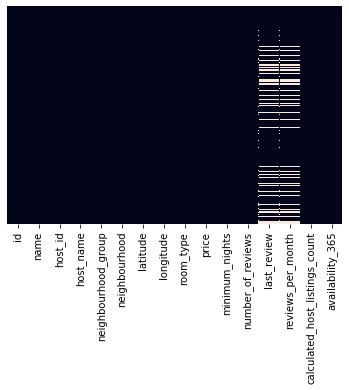

In [4]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False)

In [5]:
data.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

Avrage Price is 152$

In [6]:
data.corr().style.background_gradient(cmap='coolwarm')

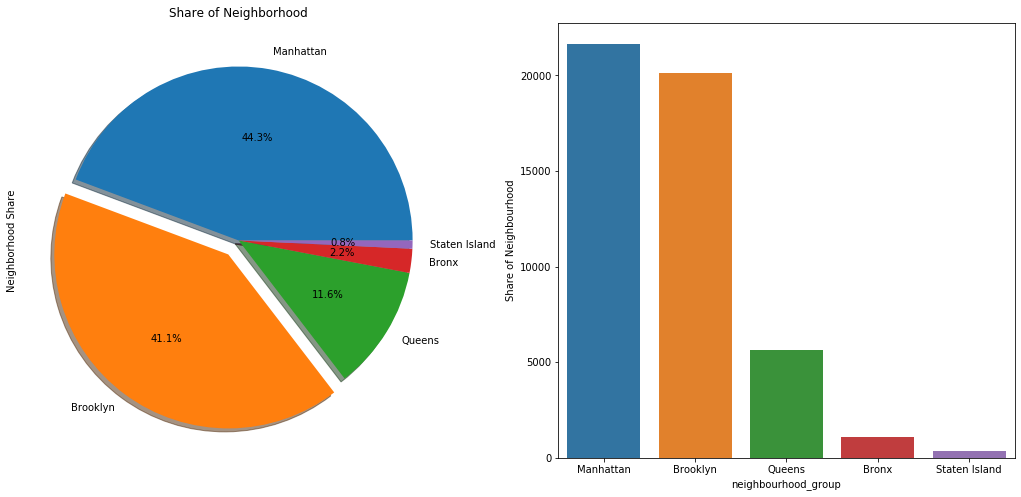

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=data,ax=ax[1],order=data['neighbourhood_group'].value_counts().index)
ax[1].set_ylabel('Share of Neighbourhood')
plt.show()

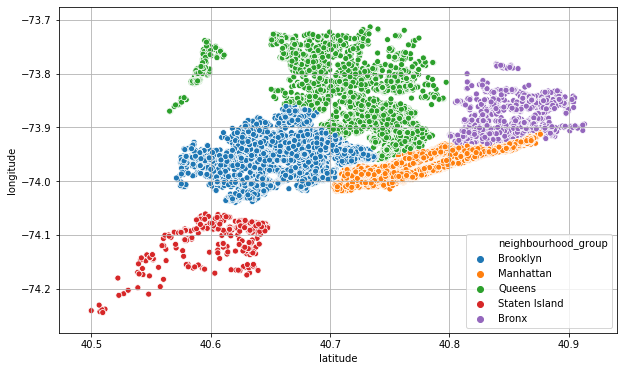

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.latitude,data.longitude,hue=data.neighbourhood_group)
plt.grid()
plt.ioff()

In [ ]:
#conda install -c conda-forge folium

In [9]:
import folium
from folium.plugins import HeatMap
m = folium.Map([40.7128,-74.0060],zoom_start=11)

HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)



The highest Density areas are marked in red and lowest density areas are marked in blue color.

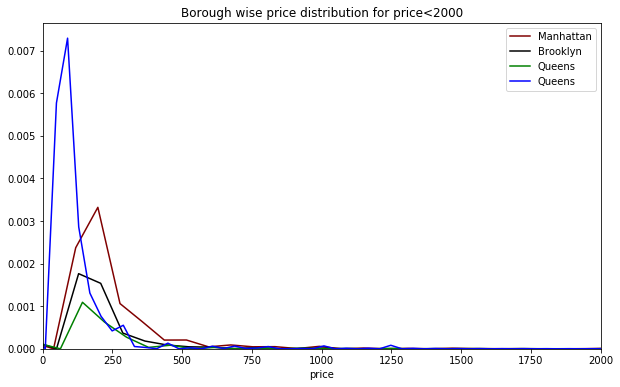

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Long Island'].price,color='blue',hist=False,label='Queens')
plt.title('Borough wise price distribution for price<2000')
plt.xlim(0,2000)
plt.show()

[]

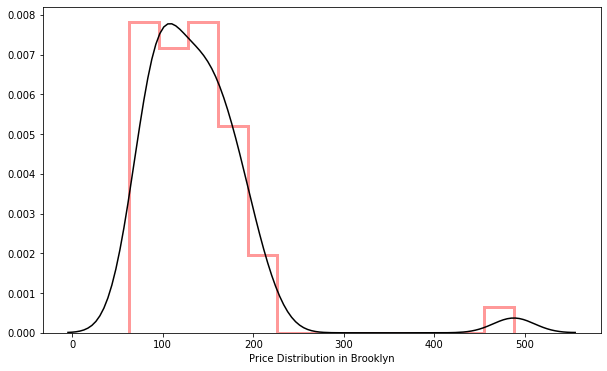

In [11]:
plt.figure(figsize=(10,6))
df1 = data[data.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
      
d = df1.groupby("neighbourhood").mean()
sns.distplot(d,color='r',axlabel ="Price Distribution in Brooklyn",kde_kws={"color": "k"},
                      hist_kws={"histtype":"step","linewidth": 3})
plt.ioff()
plt.plot()

<Figure size 720x432 with 0 Axes>

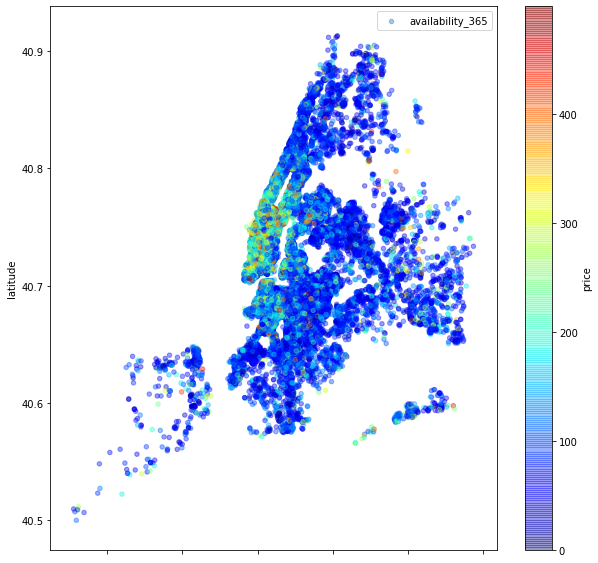

In [12]:
plt.figure(figsize=(10,6))
sub_6=data[data.price<500]
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

Red color dots are the apartment or rooms with higher price.I have considered prices upto 500 $.We can see that Manhattan region has more expensive apartments.

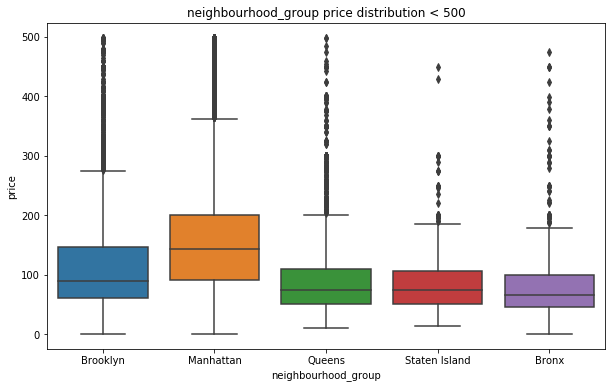

In [13]:
ng = data[data['price']< 500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

In [14]:
df_top_prices_by_neighbourhood = data.groupby('neighbourhood').agg({'price':'mean' }).sort_values('price').reset_index()


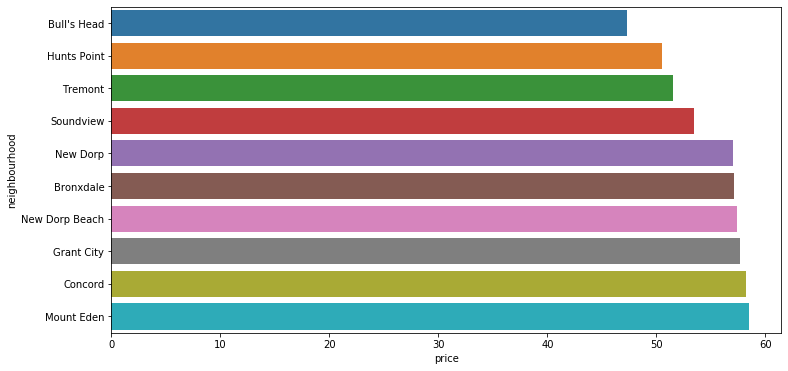

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()


Bulls Head, Hunts Point and Tremont are the neighbourhoods with least price

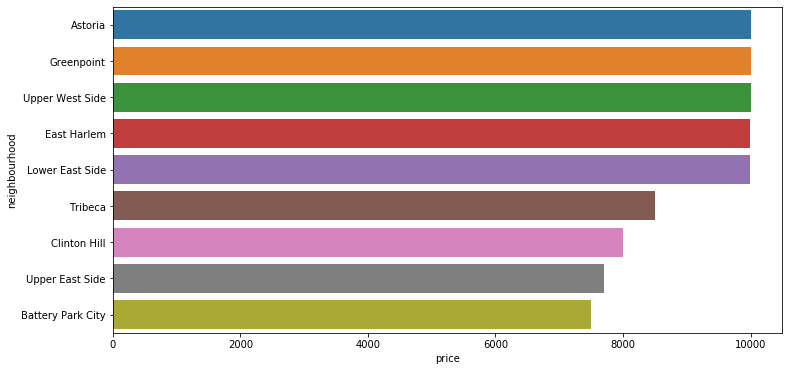

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(y='neighbourhood',x='price',data=data.nlargest(10,['price']))

It looks like Astoria,Greenpoint,Upper West Side,Harlem and Lower East Side have the the most expensive rooms

In [17]:
import plotly.offline as pyo
import plotly.graph_objs as go

roomdf = data.groupby('room_type').size()/data['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
                
                
fig.show()          
                
                

We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

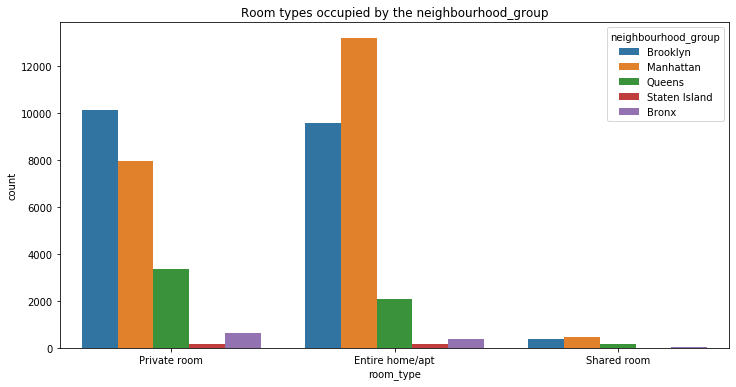

In [18]:
plt.figure(figsize=(12,6))

sns.countplot(x='room_type',hue='neighbourhood_group',data= data)
plt.title('Room types occupied by the neighbourhood_group')
plt.show()


We have got the Neighborhood wise share of rooms

<Figure size 720x432 with 0 Axes>

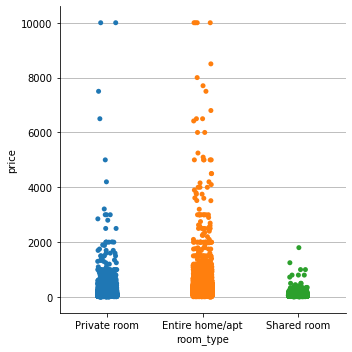

In [19]:
plt.figure(figsize=(10,6))
sns.catplot(x='room_type',y='price',data=data)
plt.grid(axis='y')
plt.ioff()

In [20]:
df1=data.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  2019-07-05   
2031      49               1                607  2019-06-21   
2030      49               1                597  2019-06-23   
2015      49               1                594  2019-06-15   
13495     47               1                576  2019-06-27   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

In [21]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)


for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


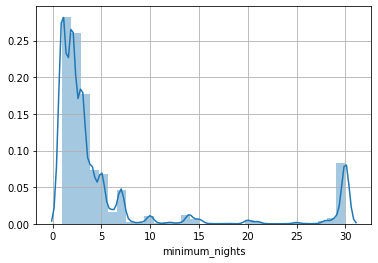

In [22]:
sns.distplot(data[(data['minimum_nights'] <= 30) & (data['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.grid()
plt.ioff()